The entire method will be implemented from scratch, including the data pipeline, model, loss function and small batch stochastic gradient descent optimizer.

In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

Construct an artificial dataset based on a linear model with noise. We use the linear model parameters 𝐰 = [2,-3.4]⊤
, 𝑏 = 4.2 and the noise term 𝜖 to generate the dataset and its labels: 𝐲=𝐗𝐰+𝑏+𝜖

In [6]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

Each row in features contains a two-dimensional data sample, and each row in labels contains a one-dimensional labeled value (a scalar).

In [7]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.8701,  0.4408]) 
label: tensor([0.9493])


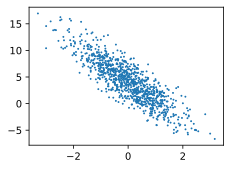

In [8]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(),
                labels.detach().numpy(), 1);

Define a data_iter function that takes as input the batch size, the feature matrix, and the label vector, and generates a small batch of size batch_size.

In [12]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

[788, 737, 723, 606, 218, 451, 73, 946, 765, 878]
tensor([[ 0.6129, -0.9419],
        [-0.3328,  1.1469],
        [-0.6029,  0.9012],
        [-1.2922,  0.9839],
        [ 0.1462,  0.5063],
        [ 1.6784,  1.1051],
        [ 0.5424,  0.2068],
        [ 0.2342, -0.1505],
        [ 0.6057, -0.9028],
        [-0.0889, -0.3420]]) 
 tensor([[ 8.6249],
        [-0.3675],
        [-0.0645],
        [-1.7245],
        [ 2.7757],
        [ 3.7822],
        [ 4.5848],
        [ 5.1824],
        [ 8.4763],
        [ 5.1803]])


Definition Initialize model parameters.

In [16]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

Define the model.

In [17]:
def linreg(X, w, b):
    """Linear regression modeling."""
    return torch.matmul(X, w) + b

Define the loss function.

In [18]:
def squared_loss(y_hat, y):
    """mean square loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

Define the optimization algorithm.

In [20]:
def sgd(params, lr, batch_size):
    """Small batch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

Training process.

In [22]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()): f}')

[277, 672, 145, 201, 253, 687, 840, 82, 471, 752]
[753, 515, 241, 699, 434, 733, 240, 991, 66, 587]
[180, 798, 276, 86, 192, 226, 962, 302, 765, 830]
[85, 129, 803, 70, 965, 810, 43, 16, 744, 95]
[453, 358, 251, 237, 739, 173, 857, 299, 368, 280]
[529, 162, 97, 703, 854, 832, 422, 656, 877, 157]
[963, 862, 385, 67, 220, 215, 63, 593, 704, 430]
[178, 456, 8, 577, 822, 442, 977, 777, 644, 938]
[510, 608, 338, 572, 372, 788, 355, 324, 376, 674]
[120, 382, 780, 200, 831, 432, 737, 273, 651, 565]
[190, 762, 111, 13, 21, 216, 597, 776, 851, 451]
[624, 834, 816, 574, 808, 846, 38, 214, 390, 883]
[211, 130, 230, 599, 236, 678, 578, 923, 507, 595]
[802, 449, 360, 968, 915, 722, 49, 681, 622, 227]
[425, 437, 87, 282, 357, 495, 27, 972, 734, 645]
[224, 688, 876, 947, 423, 774, 91, 417, 431, 363]
[649, 896, 676, 942, 484, 537, 825, 698, 945, 805]
[476, 655, 782, 839, 351, 594, 322, 93, 380, 707]
[108, 308, 327, 716, 866, 364, 301, 42, 548, 68]
[868, 312, 161, 455, 534, 932, 404, 158, 562, 858]
[34

Evaluate the success of training by comparing real parameters with those learned through training.

In [23]:
print(f'Estimation error of w: {true_w - w.reshape(true_w.shape)}')
print(f'Estimation error of b: {true_b - b}')

Estimation error of w: tensor([0.0008, 0.0002], grad_fn=<SubBackward0>)
Estimation error of b: tensor([-0.0001], grad_fn=<RsubBackward1>)
